In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set Seaborn style for all plots

In [3]:
# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv("tiktok.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   V1_coder                                4287 non-null   int64  
 1   V2_video_link                           4287 non-null   object 
 2   V3_news_outlet                          4287 non-null   object 
 3   V4_country_of_origin                    4287 non-null   object 
 4   V5_news_classification                  4287 non-null   int64  
 5   V6_visual_set-up                        3979 non-null   float64
 6   V7a_images                              3979 non-null   float64
 7   V7b_text                                3979 non-null   float64
 8   V7c_screenshots_and_recordings          3979 non-null   float64
 9   V7d_graphs_maps_infoanimations          3979 non-null   float64
 10  V7e_news_brand_elements                 3979 non-null   floa

In [5]:
# --------------------------
# Check missing values
# --------------------------
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

# Drop rows with missing values (308 rows dropped)
df = df.dropna()
df.info()


Missing values per column:
 V7d_graphs_maps_infoanimations            308
V7c_screenshots_and_recordings            308
V7b_text                                  308
V7a_images                                308
V6_visual_set-up                          308
V11_general_topic                         308
V12_geographic_scope                      308
V13_follow_up                             308
V14_positive_news                         308
V15_negative_news                         308
V7e_news_brand_elements                   308
V7f_outlet-related_endcard                308
V8a_journalists_moderators_voice          308
V8b_other_peoples_voice                   308
V8c_voice_other_effect                    308
V8d_music                                 308
V8e_ambient                               308
V9a_mentions                              308
V9b_call_to_interact_on_tiktok            308
V9c_call_to_interact_outside_of_tiktok    308
V10_news_format_type                      308
V17_sc

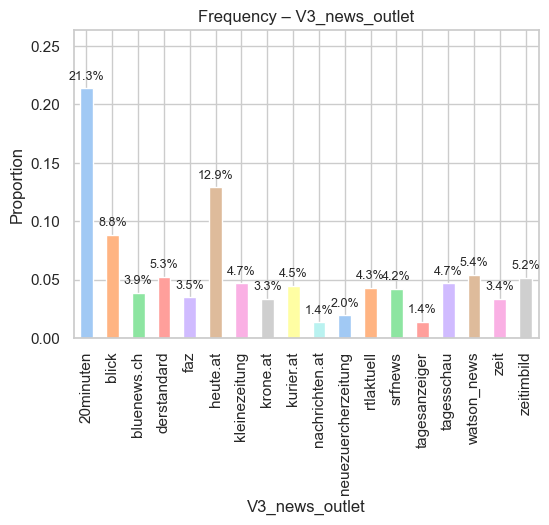

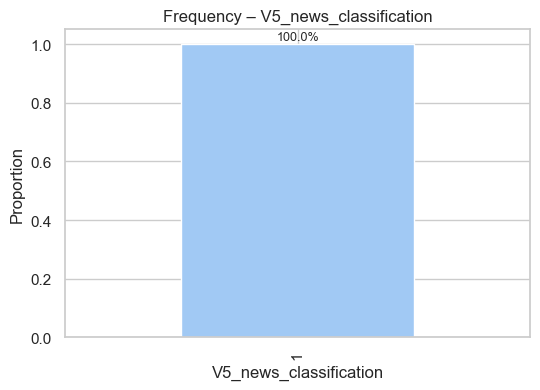

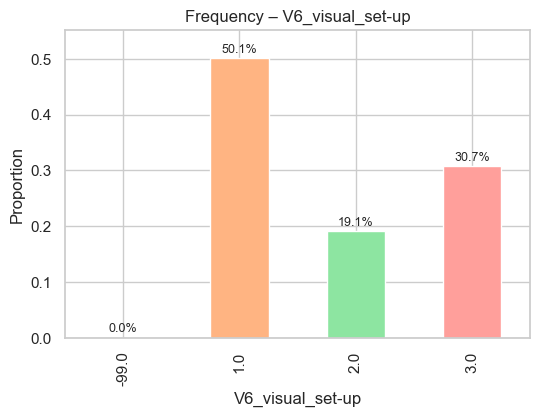

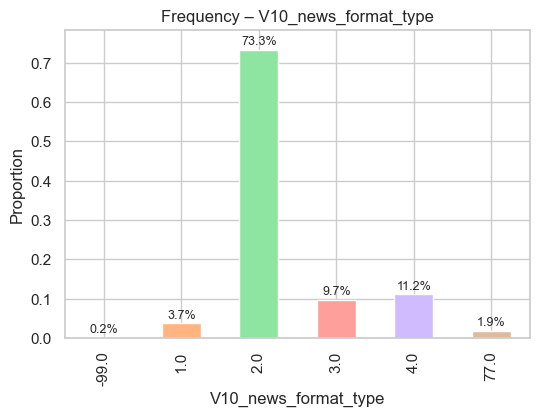

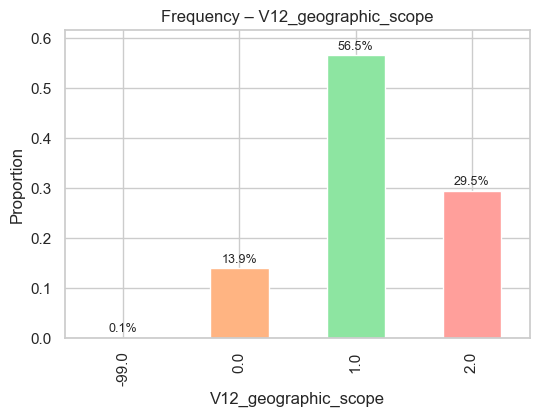

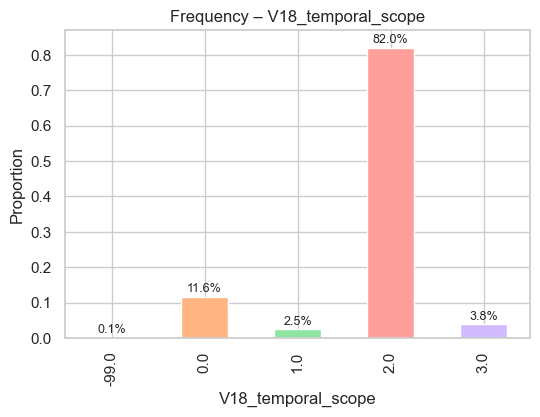

In [6]:
# --------------------------
# Descriptive statistics for categorical variables
# --------------------------
def plot_bar(col):
    """
    Plot frequency bar chart with proportions on top for a categorical column.
    """
    plt.figure(figsize=(6,4))
    counts = df[col].value_counts(normalize=True).sort_index()
    ax = counts.plot(kind='bar', color=sns.color_palette("pastel", len(counts)))
    
    plt.title(f'Frequency – {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    
    # Display percentages on bars
    for i, (idx, val) in enumerate(counts.items()):
        plt.text(i, val + 0.005, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)
    
    plt.ylim(0, counts.max() + 0.05)
    plt.show()

categorical_vars = [
    'V3_news_outlet',
    'V5_news_classification',
    'V6_visual_set-up',
    'V10_news_format_type',
    'V12_geographic_scope',
    'V18_temporal_scope'
]

for col in categorical_vars:
    plot_bar(col)

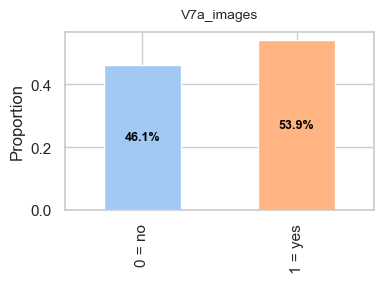

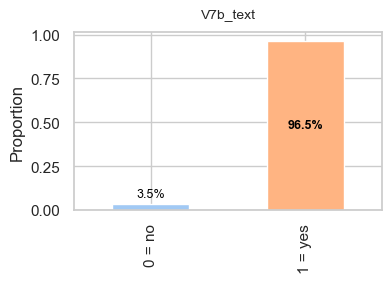

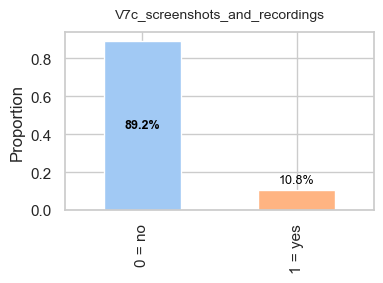

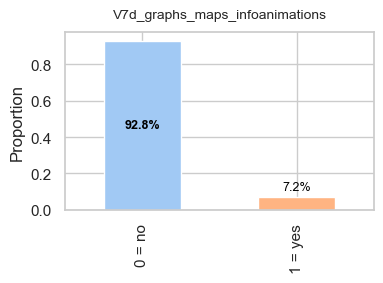

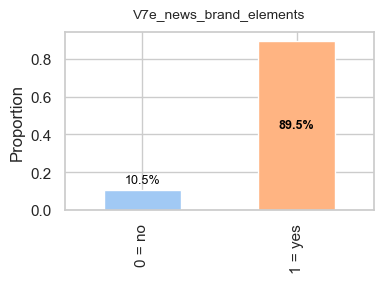

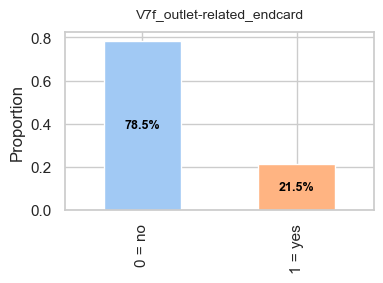

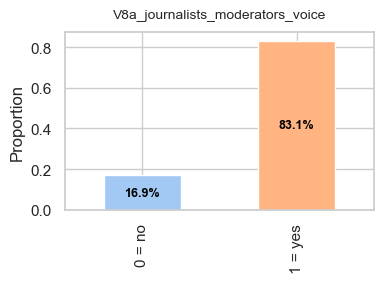

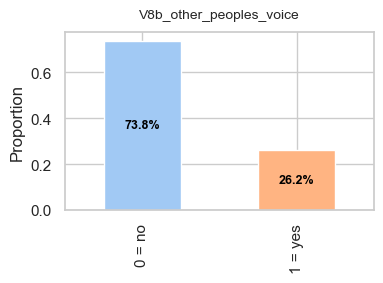

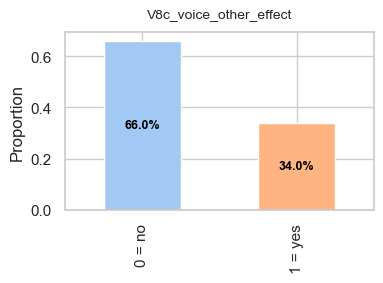

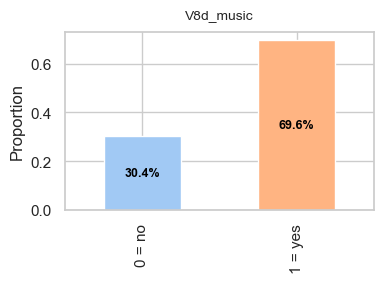

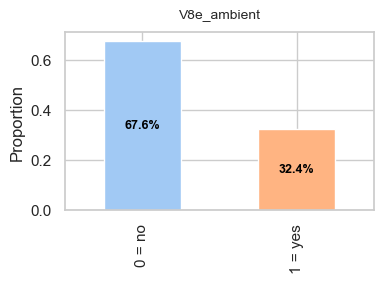

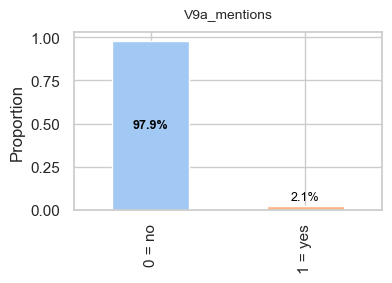

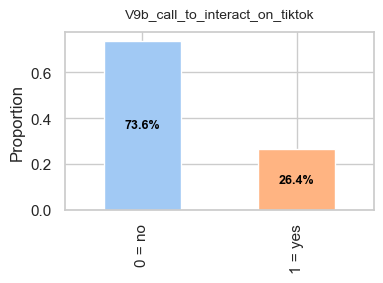

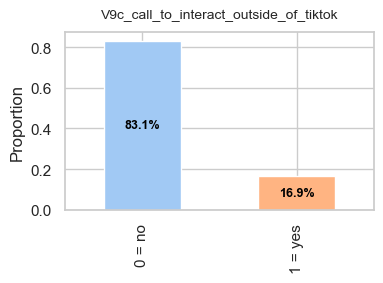

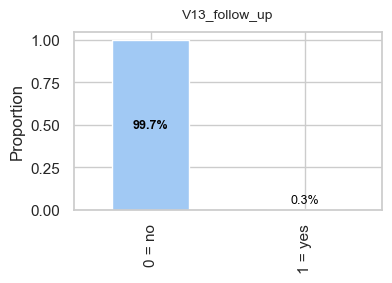

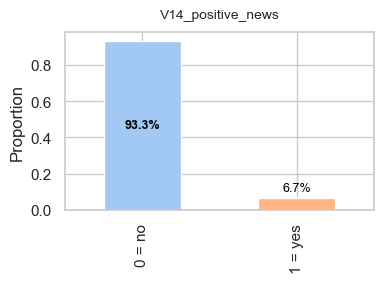

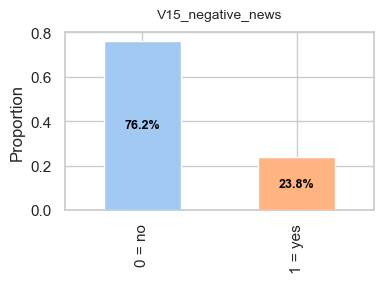

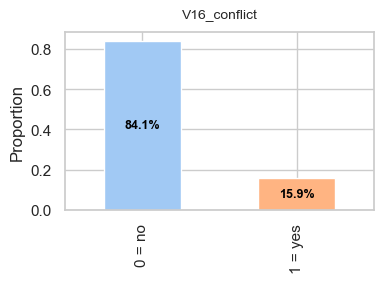

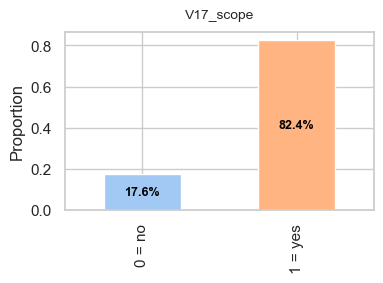

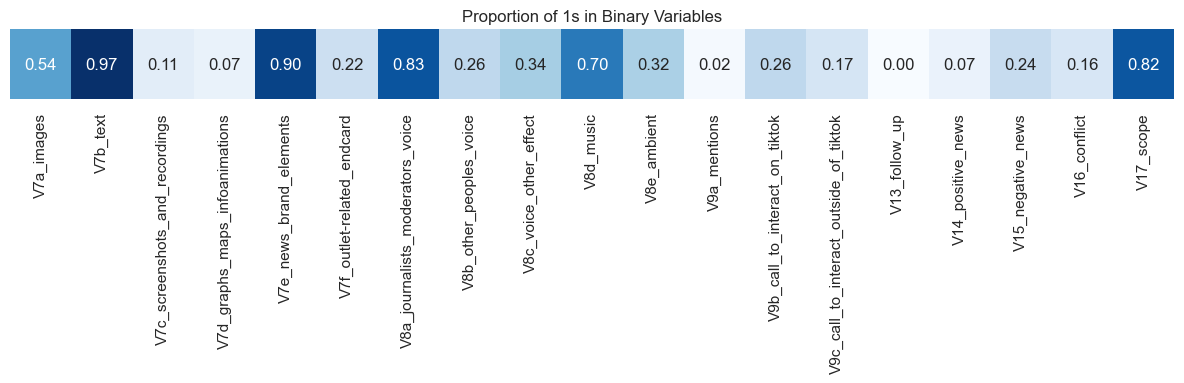

In [7]:
# --------------------------
# Binary variables visualization
# --------------------------
binary_vars = [
    # Visual elements
    'V7a_images','V7b_text','V7c_screenshots_and_recordings',
    'V7d_graphs_maps_infoanimations','V7e_news_brand_elements','V7f_outlet-related_endcard',
    # Audio elements
    'V8a_journalists_moderators_voice','V8b_other_peoples_voice',
    'V8c_voice_other_effect','V8d_music','V8e_ambient',
    # Interactive elements
    'V9a_mentions','V9b_call_to_interact_on_tiktok','V9c_call_to_interact_outside_of_tiktok',
    # Content features
    'V13_follow_up','V14_positive_news','V15_negative_news',
    'V16_conflict','V17_scope'
]

# Bar plots for binary variables
for col in binary_vars:
    plt.figure(figsize=(4,3))
    counts = df[col].value_counts(normalize=True).sort_index()
    counts.plot(kind='bar', color=sns.color_palette("pastel", len(counts)))
    
    plt.title(col, fontsize=10, pad=10)
    plt.xlabel("")
    plt.ylabel("Proportion")
    plt.xticks([0,1], ['0 = no', '1 = yes'])
    plt.ylim(0, 1.05 * counts.max())

    for i, (idx, val) in enumerate(counts.items()):
        if val > 0.15:
            plt.text(i, val/2, f"{val*100:.1f}%", ha='center', va='center', color='black', fontsize=9, fontweight='bold')
        else:
            plt.text(i, val + 0.02, f"{val*100:.1f}%", ha='center', va='bottom', color='black', fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Heatmap of mean values for binary variables
plt.figure(figsize=(12, 4))
sns.heatmap(df[binary_vars].mean().to_frame().T, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Proportion of 1s in Binary Variables")
plt.yticks([])
plt.tight_layout()
plt.show()




Descriptive statistics for numeric features:
                          mean            std  min        max
M4_like_count      4916.552870   20747.547546  1.0   821805.0
M5_view_count     51576.217610  226488.972201  0.0  7105469.0
M6_comment_count    229.276687    2271.873176  0.0   137075.0
M7_share_count      320.605588    2016.501841  0.0    66363.0
M4_like_count: 508 outliers (12.77%)
M5_view_count: 662 outliers (16.64%)
M6_comment_count: 549 outliers (13.80%)
M7_share_count: 678 outliers (17.04%)


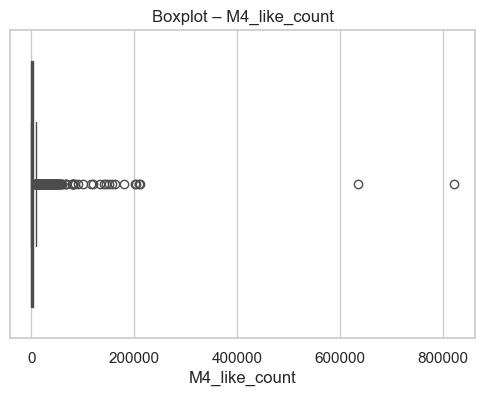

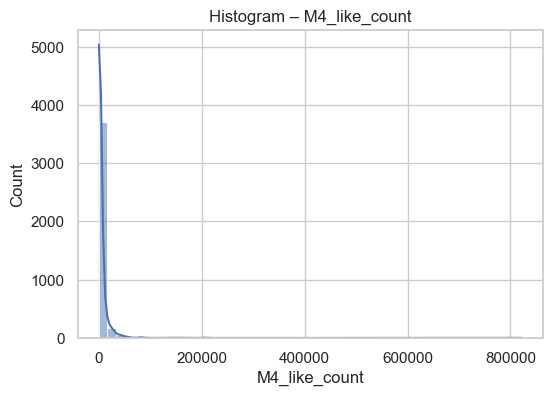

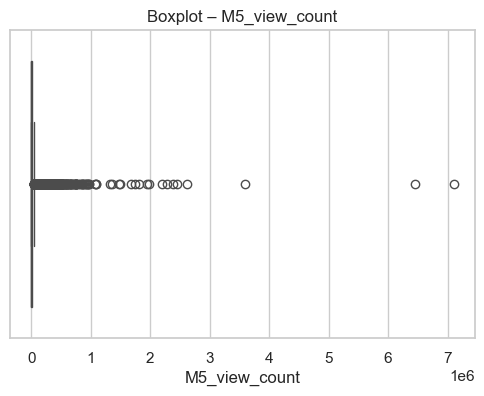

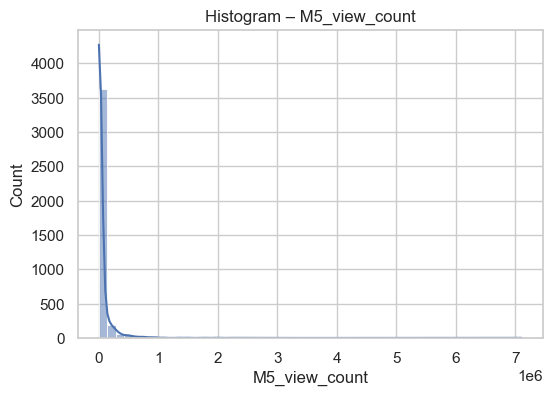

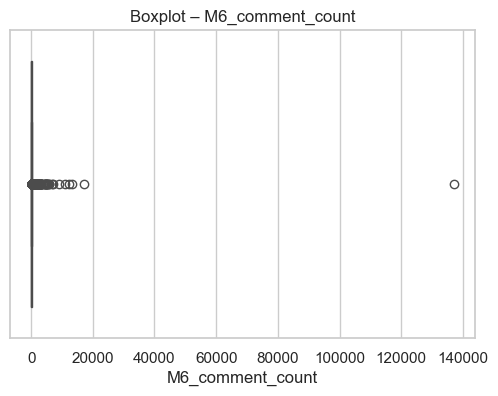

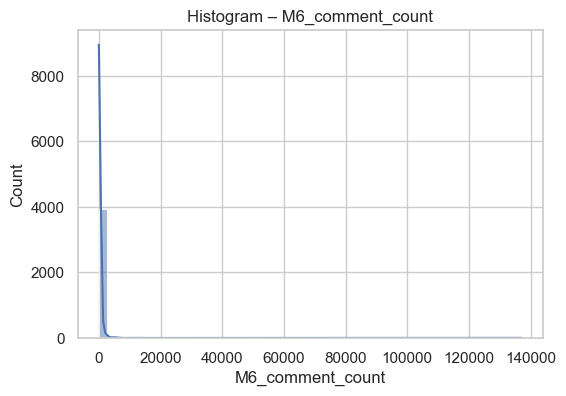

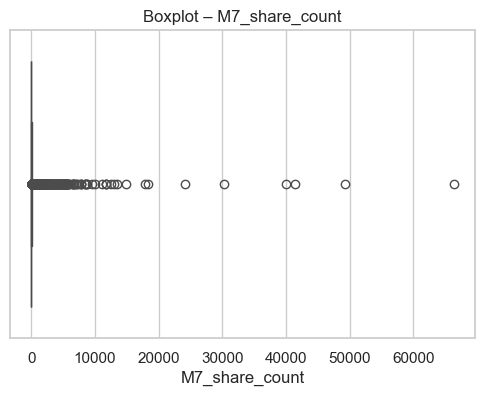

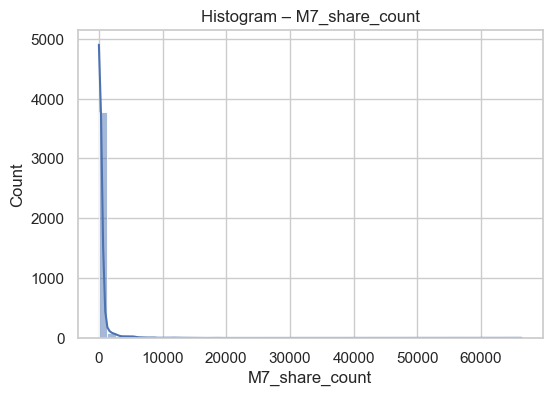

In [13]:
# --------------------------
# Numeric variables: outliers and distributions
# --------------------------
numeric_vars = ['M4_like_count','M5_view_count','M6_comment_count','M7_share_count']

# --- Summary statistics ---
print("\nDescriptive statistics for numeric features:")
summary_stats = df[numeric_vars].agg(['mean', 'std', 'min', 'max']).T
print(summary_stats)

# Detect outliers using IQR
for col in numeric_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# Boxplots and histograms
for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot – {col}')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histogram – {col}')
    plt.show()

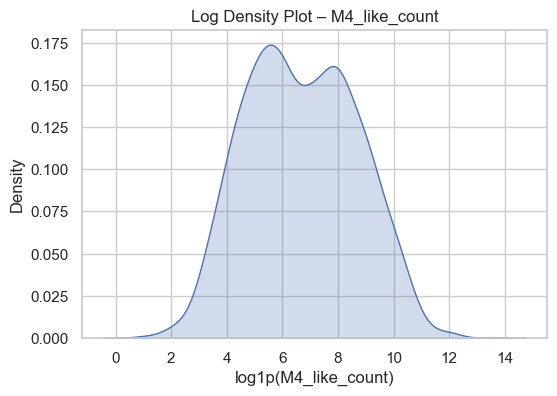

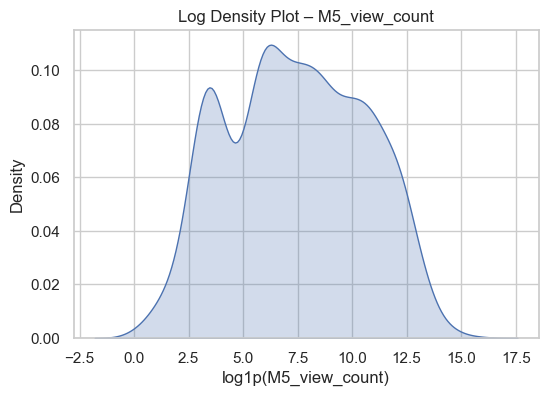

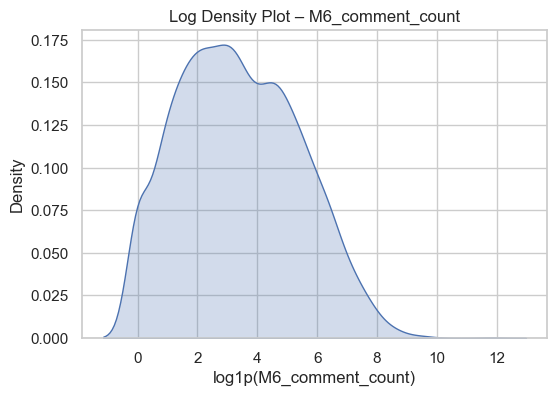

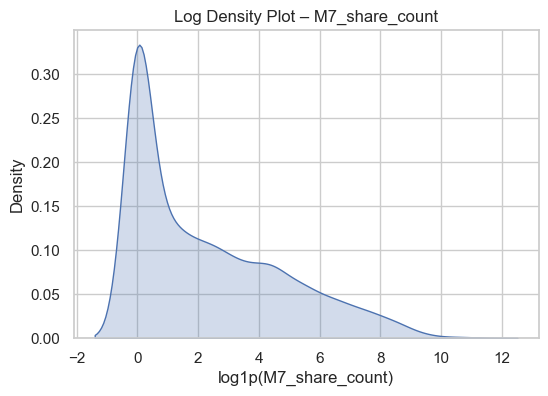

In [9]:
# --------------------------
# Log-transform numeric variables to reduce skewness
# --------------------------
for col in numeric_vars:
    df[f'{col}_log'] = np.log1p(df[col])  # log(1 + x) to handle zeros

# Density plots after log transformation
for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[f'{col}_log'].dropna(), fill=True)
    plt.title(f'Log Density Plot – {col}')
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Density')
    plt.show()



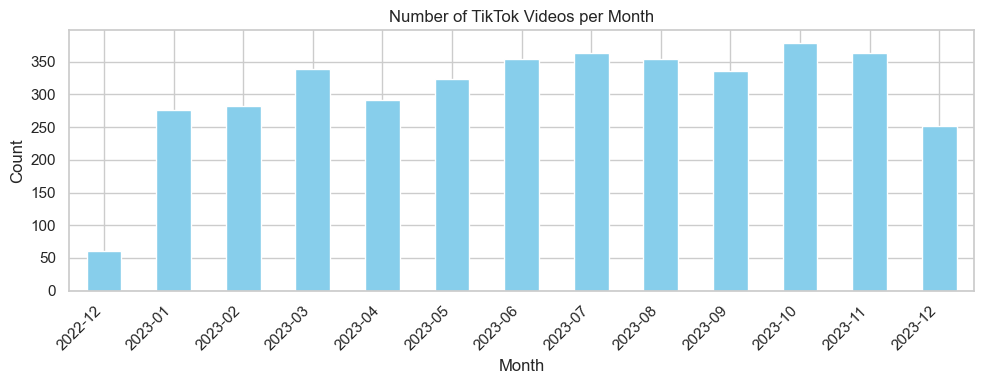

In [17]:
# --------------------------
# Datetime processing
# --------------------------
df['M3_create_time'] = pd.to_datetime(df['M3_create_time'], errors='coerce')

# Posts per month (count)
df['month'] = df['M3_create_time'].dt.to_period("M")
posts_per_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(10,4))
posts_per_month.plot(kind='bar', color="skyblue")
plt.title("Number of TikTok Videos per Month")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

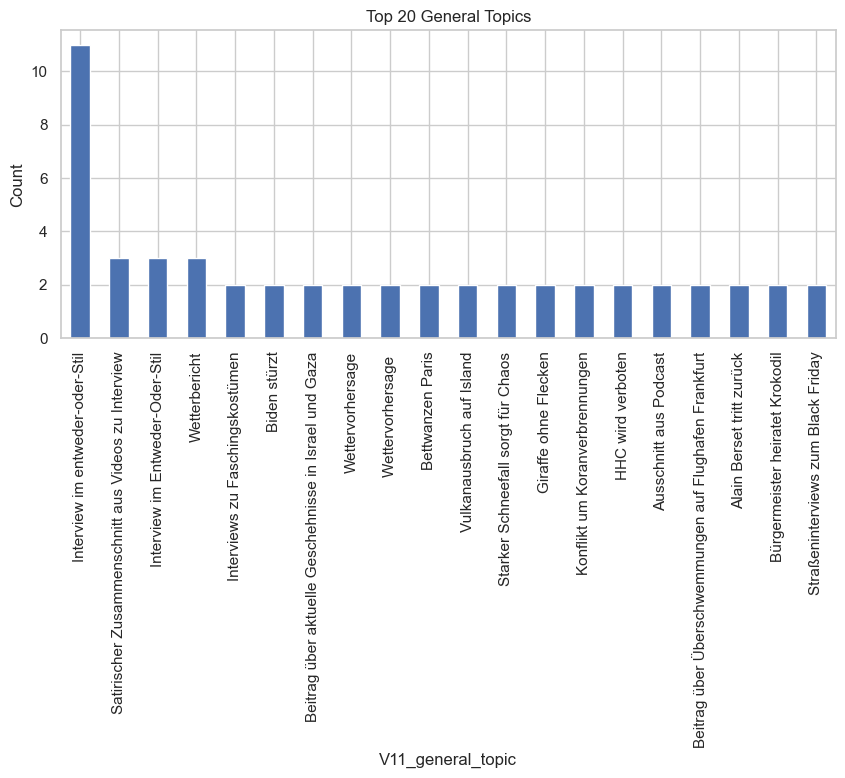

In [11]:
# --------------------------
# Text variable overview
# --------------------------
# Top 20 most frequent general topics
df['V11_general_topic'].value_counts().head(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 General Topics")
plt.ylabel("Count")
plt.show()


In [12]:
# --------------------------
# Replace invalid codes with NaN
# --------------------------
invalid_codes = [-99, 77]
for col in df.columns:
    df[col] = df[col].replace(invalid_codes, np.nan)

# Drop all rows with any missing values after replacement
df_clean = df.dropna().copy()
print(f"Original rows: {df.shape[0]}, Cleaned rows: {df_clean.shape[0]}, Missing values: {df_clean.isna().sum().sum()}")

# Save cleaned dataset
df_clean.to_csv("tiktok_clean.csv", index=False)


Original rows: 3978, Cleaned rows: 3868, Missing values: 0
